# Data Forecasting with prophet


# PROPHET PREDICTION

## TESTO

## Import Dependencies

In [1]:
!pip3 install chart_studio
!pip3 install fbprophet

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pandas as pd
import numpy as np
import chart_studio.plotly as plotly
import plotly.figure_factory as ff
from plotly import graph_objs as go
from fbprophet import Prophet
from fbprophet.plot import plot_plotly

import sys
from os.path import join
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from numpy import sqrt
import itertools
from fbprophet import Prophet
from fbprophet.diagnostics import performance_metrics, cross_validation

import os

In [3]:
dataset_path = open("/Users/riccardobaratin/Documents/GitHub/iot-project/datasets/temperature_dataset.csv")
data = dataset_path.read()
dataset_path.close()
lines = data.split('\n')
header = lines[0].split(',')
lines = lines[1:]
print(len(lines))
for i,j in enumerate(header):
    print(i,j)

2880
0 "TIME"
1 "TEMP"
2 "PREC"
3 "RHAVG"
4 "W_SCAL_INT"
5 "W_VEC_DIR"
6 "W_VEC_INT"
7 "LEAFW"


In [4]:
# Convert lines list into Numpy array float_data - without the date

float_data = np.zeros((len(lines), len(header) - 1))
for i, line in enumerate(lines):
    values = [float(x) for x in line.split(',')[1:]]
    float_data[i,:] = values
    print(float_data)
          
print(float_data.shape)

[[  4.3   0.4  89.4 ... 315.7   1.6   1. ]
 [  0.    0.    0.  ...   0.    0.    0. ]
 [  0.    0.    0.  ...   0.    0.    0. ]
 ...
 [  0.    0.    0.  ...   0.    0.    0. ]
 [  0.    0.    0.  ...   0.    0.    0. ]
 [  0.    0.    0.  ...   0.    0.    0. ]]
[[  4.3   0.4  89.4 ... 315.7   1.6   1. ]
 [  4.1   0.4  88.6 ... 340.7   0.7   1. ]
 [  0.    0.    0.  ...   0.    0.    0. ]
 ...
 [  0.    0.    0.  ...   0.    0.    0. ]
 [  0.    0.    0.  ...   0.    0.    0. ]
 [  0.    0.    0.  ...   0.    0.    0. ]]
[[  4.3   0.4  89.4 ... 315.7   1.6   1. ]
 [  4.1   0.4  88.6 ... 340.7   0.7   1. ]
 [  4.    0.   89.1 ... 226.3   0.5   1. ]
 ...
 [  0.    0.    0.  ...   0.    0.    0. ]
 [  0.    0.    0.  ...   0.    0.    0. ]
 [  0.    0.    0.  ...   0.    0.    0. ]]
[[  4.3   0.4  89.4 ... 315.7   1.6   1. ]
 [  4.1   0.4  88.6 ... 340.7   0.7   1. ]
 [  4.    0.   89.1 ... 226.3   0.5   1. ]
 ...
 [  0.    0.    0.  ...   0.    0.    0. ]
 [  0.    0.    0.  ...   0.   

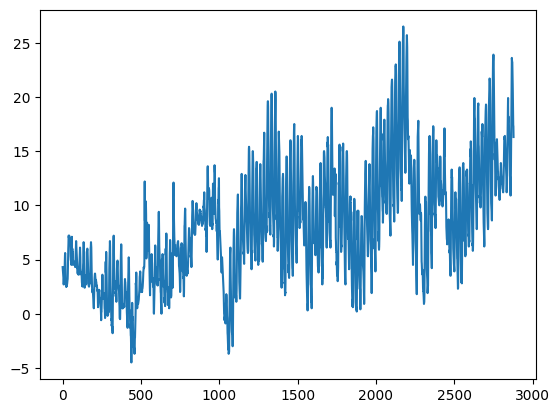

In [5]:
temp = float_data[:, 0] 
plt.plot(range(len(temp)), temp)

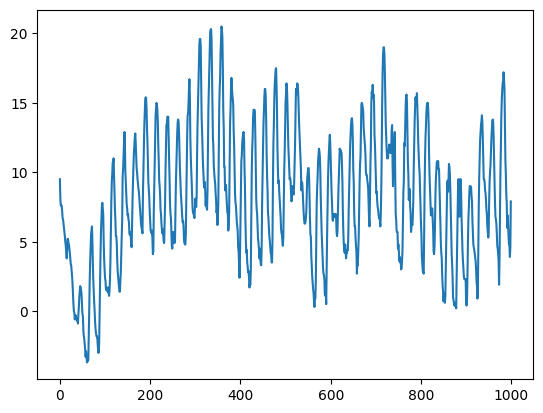

In [6]:
plt.plot(range(1000), temp[1000:2000])

In [17]:
# Normalize data

print(float_data[1])

mean = float_data.mean(axis=0)
float_data -= mean
std = float_data.std(axis=0)
float_data /= std

print(float_data[1])

[-0.7511298   1.21634864  1.14006946 -1.15919381  1.46993592 -1.04657959
  2.27020839]
[-0.7511298   1.21634864  1.14006946 -1.15919381  1.46993592 -1.04657959
  2.27020839]


In [8]:
temp = float_data[:, 0] 

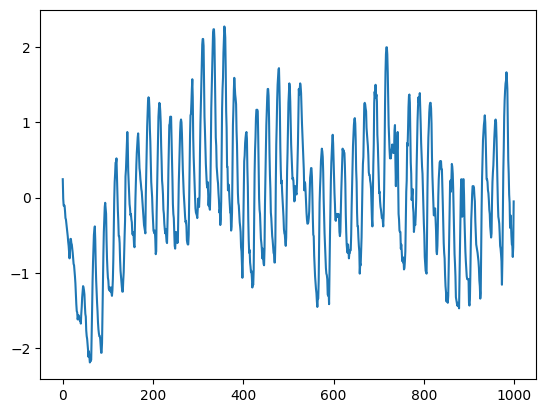

In [9]:
plt.plot(range(1000), temp[1000:2000])

### Sanity check - Baseline - Naive model ... temp at n+1 = temp at n

In [12]:
prev_val = temp[0]
sum_mae = 0
sse = 0
for n in range(0, len(temp)-1):
    err = temp[n] - prev_val
    sq_err = err ** 2
    sse = sse + sq_err
    prev_val = temp[n]
    sum_mae = sum_mae + np.abs(err)
    
mse = sse / n
rmse = np.sqrt(mse)
mae = sum_mae / n

print('RMSE =',round(rmse,5))
print('MAE =',round(mae,5))
print('Celsius MAE ', round(mae * std[1],2))
print(std[1])

RMSE = 0.191
MAE = 0.13828
Celsius MAE  0.04
0.293826803641528


In [245]:
# Naive model prediction on a subset

UlimPred = 200
LlimPred = 100

predTemp = []

for n in range(LlimPred, UlimPred):
    predTemp.append(temp[n-1])
    
predTemp = np.array(predTemp)  
predTemp.shape

(100,)

/var/folders/n9/754psrw51dg25ldhmszf6lyh0000gn/T/ipykernel_14054/340875056.py:15: UserWarning: Legend does not support 'A' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend('Actual', 'Predicted')
/var/folders/n9/754psrw51dg25ldhmszf6lyh0000gn/T/ipykernel_14054/340875056.py:15: UserWarning: Legend does not support 'c' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend('Actual', 'Predicted')
/var/folders/n9/754psrw51dg25ldhmszf6lyh0000gn/T/ipykernel_14054/340875056.py:15: UserWarning: Legend does not support 't' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend('Actual', 'Predicted')
/var/fo

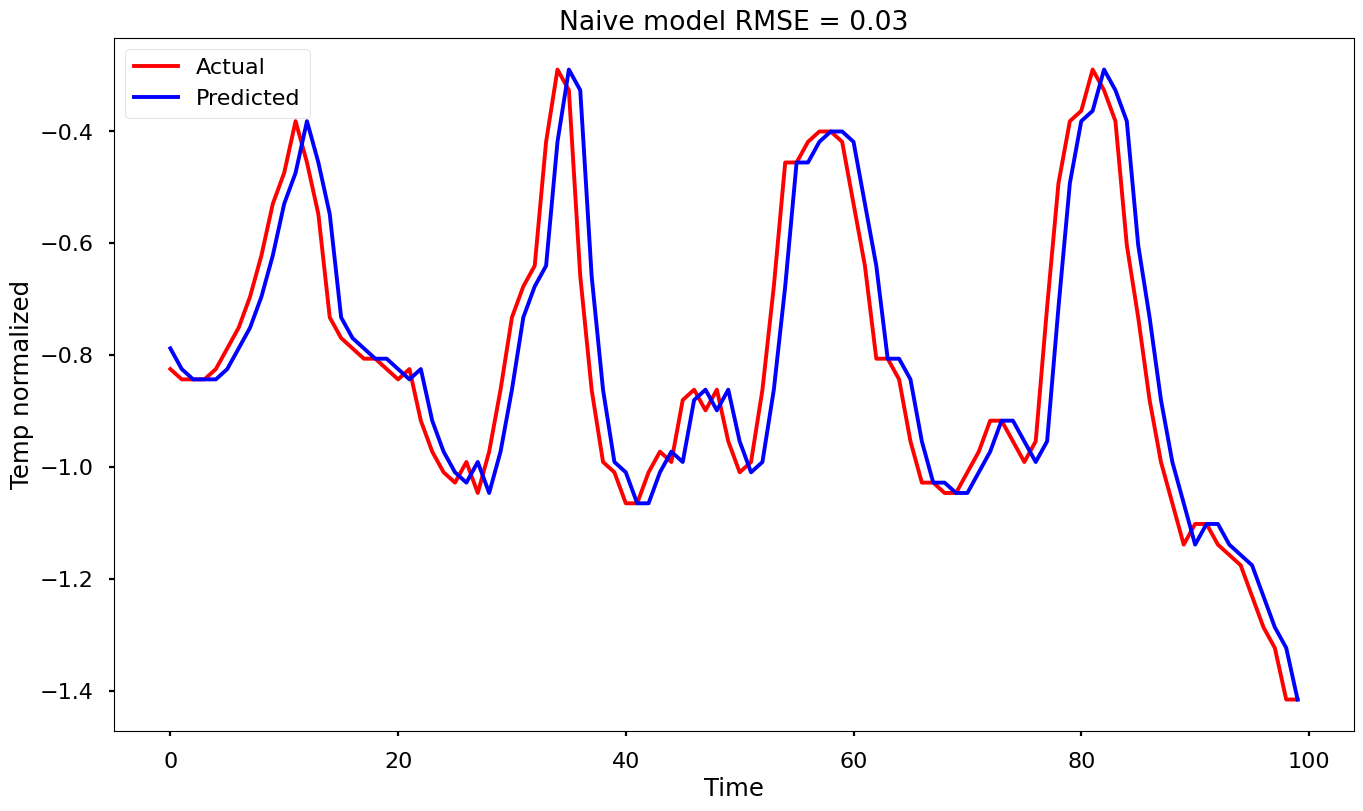

In [247]:
# Superimposed: model prediction (blue) vs reality (red)

plt.rcParams["figure.figsize"] = [16,9]

# Chart Test
UlimReal = 200
LlimReal = 100
SampleSizeReal = UlimReal - LlimReal
plt.plot(range(SampleSizeReal), temp[LlimReal:UlimReal], 'r', label="Actual")

# Chart Predicted 
UlimPred = UlimReal - LlimReal
LlimPred = 0
SampleSizePred = UlimPred - LlimPred
plt.legend('Actual', 'Predicted')
plt.plot(range(SampleSizePred), predTemp[LlimPred:UlimPred], 'b', label="Predicted")
plt.legend(loc="upper left")

plt.title('Naive model RMSE = 0.03')
plt.xlabel('Time')
plt.ylabel('Temp normalized')

plt.show()

### Baseline naive model RMSE = 0.029 MAE = 0.019

### This naive model will be very difficult to beat...

### FB Prophet univariate
### prophet REQUIRES a pandas df at the below config ...date column named as DS and the value column as Y

In [248]:
date_rng = pd.date_range(start='01/01/2021', end='05/01/2021', freq='1H')
date_rng[0:2880]

DatetimeIndex(['2021-01-01 00:00:00', '2021-01-01 01:00:00',
               '2021-01-01 02:00:00', '2021-01-01 03:00:00',
               '2021-01-01 04:00:00', '2021-01-01 05:00:00',
               '2021-01-01 06:00:00', '2021-01-01 07:00:00',
               '2021-01-01 08:00:00', '2021-01-01 09:00:00',
               ...
               '2021-04-30 14:00:00', '2021-04-30 15:00:00',
               '2021-04-30 16:00:00', '2021-04-30 17:00:00',
               '2021-04-30 18:00:00', '2021-04-30 19:00:00',
               '2021-04-30 20:00:00', '2021-04-30 21:00:00',
               '2021-04-30 22:00:00', '2021-04-30 23:00:00'],
              dtype='datetime64[ns]', length=2880, freq='H')

In [249]:
temp4Prophet = pd.DataFrame(temp)
temp4Prophet.columns=['y']
temp4Prophet['ds'] = date_rng[0:2880]
temp4Prophet = temp4Prophet[['ds','y']]
temp4Prophet

,ds,y
0,2021-01-01 00:00:00,-0.714221
1,2021-01-01 01:00:00,-0.751130
2,2021-01-01 02:00:00,-0.769584
3,2021-01-01 03:00:00,-0.806494
4,2021-01-01 04:00:00,-0.861858
...,...,...
2875,2021-04-30 19:00:00,2.090886
2876,2021-04-30 20:00:00,1.980158
2877,2021-04-30 21:00:00,1.703338
2878,2021-04-30 22:00:00,1.684884


### We reduce dataset for Prophet to one sample every 2 steps - one sample per two instead of one every hour

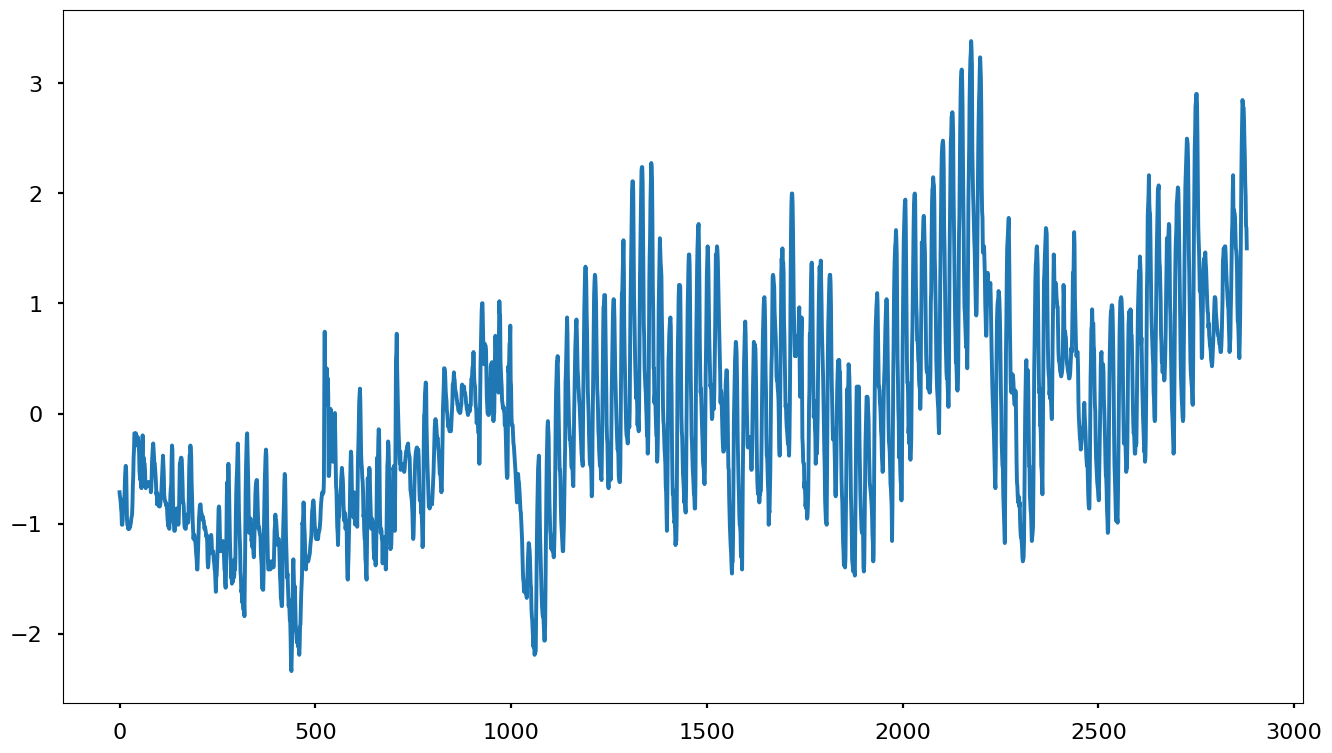

In [250]:
plt.plot(temp4Prophet['y'])

In [251]:
print(temp4Prophet.shape)
temp4Prophet = temp4Prophet.iloc[::2, :]
temp4Prophet.shape

(2880, 2)


(1440, 2)

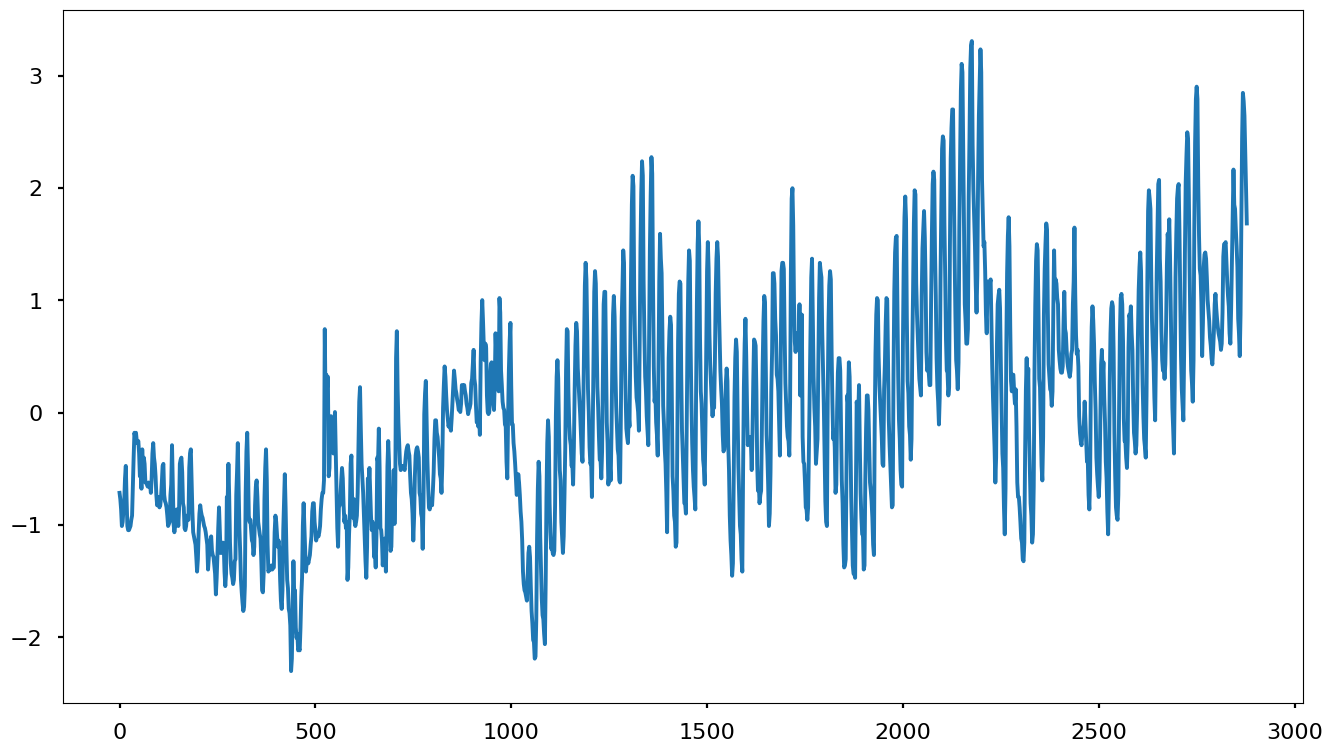

In [252]:
plt.plot(temp4Prophet['y'])

In [253]:
ds4Naive = pd.DataFrame(temp4Prophet['y'])
ds4Naive.reset_index(inplace=True)
ds4Naive.drop('index', axis=1, inplace=True)
ds4Naive

,y
0,-0.714221
1,-0.769584
2,-0.861858
3,-1.009495
4,-0.972586
...,...
1435,2.773708
1436,2.644525
1437,2.330796
1438,1.980158


In [254]:
# Baseline naive model on the smaller dataset

prev_val = ds4Naive.iloc[0]['y']
sum_mae = 0
sse = 0

for n in range(0, len(ds4Naive)-1):
    err = ds4Naive.iloc[n]['y'] - prev_val
    sq_err = err ** 2
    sse = sse + sq_err
    prev_val = ds4Naive.iloc[n]['y']
    sum_mae = sum_mae + np.abs(err)
    
mse = sse / n
rmse = np.sqrt(mse)
mae = sum_mae / n

print('RMSE =',round(rmse,5))
print('MAE =',round(mae,5))
print('Celsius MAE ', round(mae * std[1],2))

RMSE = 0.34961
MAE = 0.25783
Celsius MAE  0.26


In [268]:
#Split into train = 300k/6 and test = 420551/6 - 300k/6

trainProphet = temp4Prophet.iloc[0:1000]
print(trainProphet.shape)
trainProphet.head()

(1000, 2)


,ds,y
0,2021-01-01 00:00:00,-0.714221
2,2021-01-01 02:00:00,-0.769584
4,2021-01-01 04:00:00,-0.861858
6,2021-01-01 06:00:00,-1.009495
8,2021-01-01 08:00:00,-0.972586


In [269]:
testProphet = temp4Prophet.iloc[1001:]
print(testProphet.shape)
testProphet.head()

(439, 2)


,ds,y
2002,2021-03-25 10:00:00,1.315791
2004,2021-03-25 12:00:00,1.740248
2006,2021-03-25 14:00:00,1.924794
2008,2021-03-25 16:00:00,1.721793
2010,2021-03-25 18:00:00,0.854425


## Train / Fit

In [270]:
%%time

# Train / Fit

# prophet REQUIRES a pandas df at the below config ... date column named as DS and the value column as Y

model = Prophet(changepoint_prior_scale=0.001,
               seasonality_prior_scale = 0.01)  

#model = Prophet(seasonality_mode='multiplicative', changepoint_prior_scale=0.5)  
#model = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=True, seasonality_mode='multiplicative')  
model.fit(trainProphet) # fit the model with the dataframe
print('Prophet is trained')

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/Users/riccardobaratin/Library/Python/3.8/lib/python/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -75.8807
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
       1      -75.8807             0       950.761       1e-12       0.001       24   
Optimization terminated with error: 
  Line search failed to achieve a sufficient decrease, no more progress can be made
Prophet is trained
CPU times: user 1.7 s, sys: 21.4 ms, total: 1.72 s
Wall time: 1.72 s

Initial log joint probability = -793.129
Iteration  1. Log joint probability =    455.857. Improved by 1248.99.
Iteration  2. Log joint probability =    711.777. Improved by 255.92.
Iteration  3. Log joint probability =    734.783. Improved by 23.0066.
Iteration  4. Log joint probability =    737.369. Improved by 2.58606.
Iteration  5. Log joint probability =    744.649. Improved by 7.28016.
Iteration  6. Log joint probability =    745.164. Improved by 0.514385.
Iteration  7. Log joint probability =     745.68. Improved by 0.515752.
Iteration  8. Log joint probabi

In [271]:
%%time

# Forecast / Predict

future = model.make_future_dataframe(periods = testProphet.shape[0], freq = '1H')  
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

/Users/riccardobaratin/Library/Python/3.8/lib/python/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/riccardobaratin/Library/Python/3.8/lib/python/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


CPU times: user 8.68 s, sys: 6.21 s, total: 14.9 s
Wall time: 2.33 s


,ds,yhat,yhat_lower,yhat_upper
0,2021-01-01 00:00:00,-1.121684,-1.944189,-0.333252
1,2021-01-01 02:00:00,-1.149574,-1.944581,-0.394040
2,2021-01-01 04:00:00,-1.194460,-1.963276,-0.432993
3,2021-01-01 06:00:00,-1.215907,-1.984431,-0.368322
4,2021-01-01 08:00:00,-1.077046,-1.905658,-0.311456
...,...,...,...,...
1434,2021-04-12 09:00:00,0.629228,-0.112950,1.436383
1435,2021-04-12 10:00:00,0.725520,-0.076447,1.525762
1436,2021-04-12 11:00:00,0.795829,-0.020832,1.641212
1437,2021-04-12 12:00:00,0.845388,0.076939,1.671109


In [272]:
dataList = list(testProphet.y.values)
print(len(dataList))
print(len(forecast['yhat'][1000:]))

rmse = sqrt(mean_squared_error(dataList,forecast['yhat'][1000:]))
print('Prophet RMSE: %.3f' % rmse)

mae = mean_absolute_error(dataList,forecast['yhat'][1000:])
print('Prophet MAE: %.3f' % mae)

439
439
Prophet RMSE: 1.007
Prophet MAE: 0.786


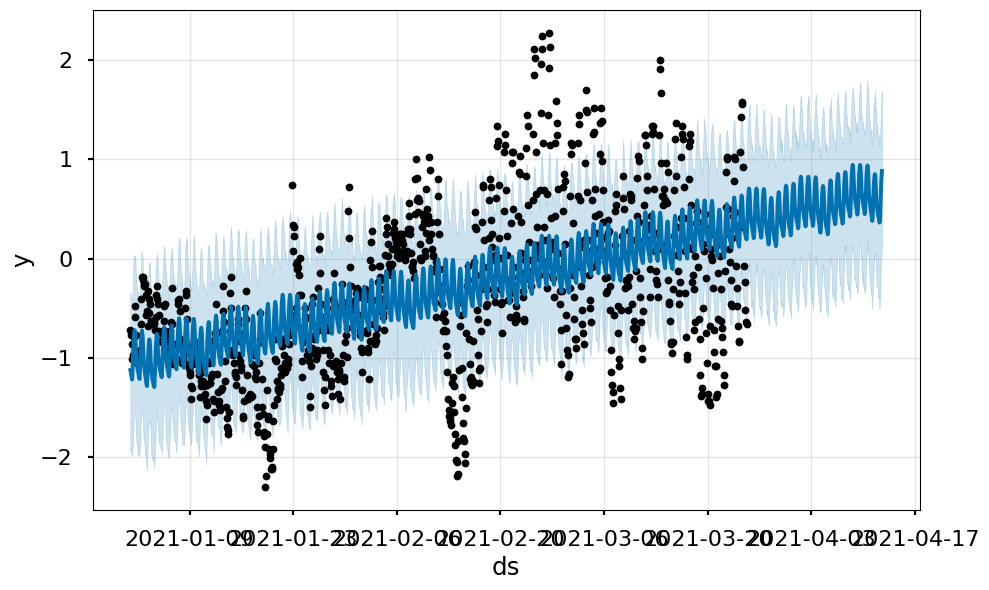

In [273]:
FigFor = model.plot(forecast)

/Users/riccardobaratin/Library/Python/3.8/lib/python/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/riccardobaratin/Library/Python/3.8/lib/python/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


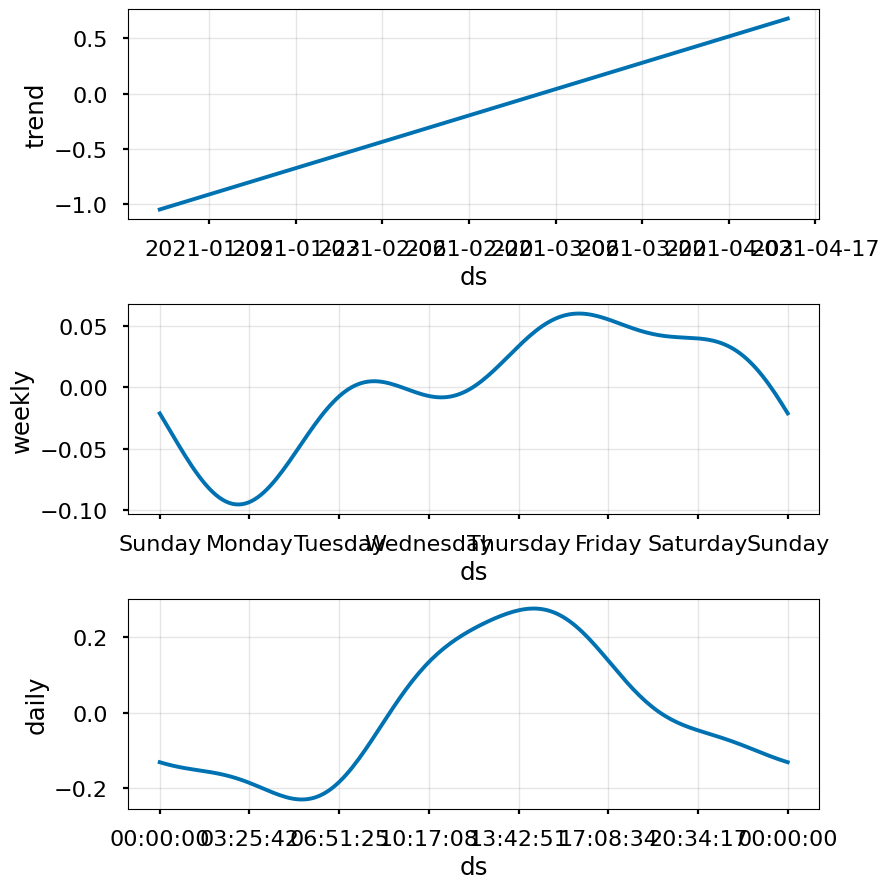

In [274]:
figComp = model.plot_components(forecast)

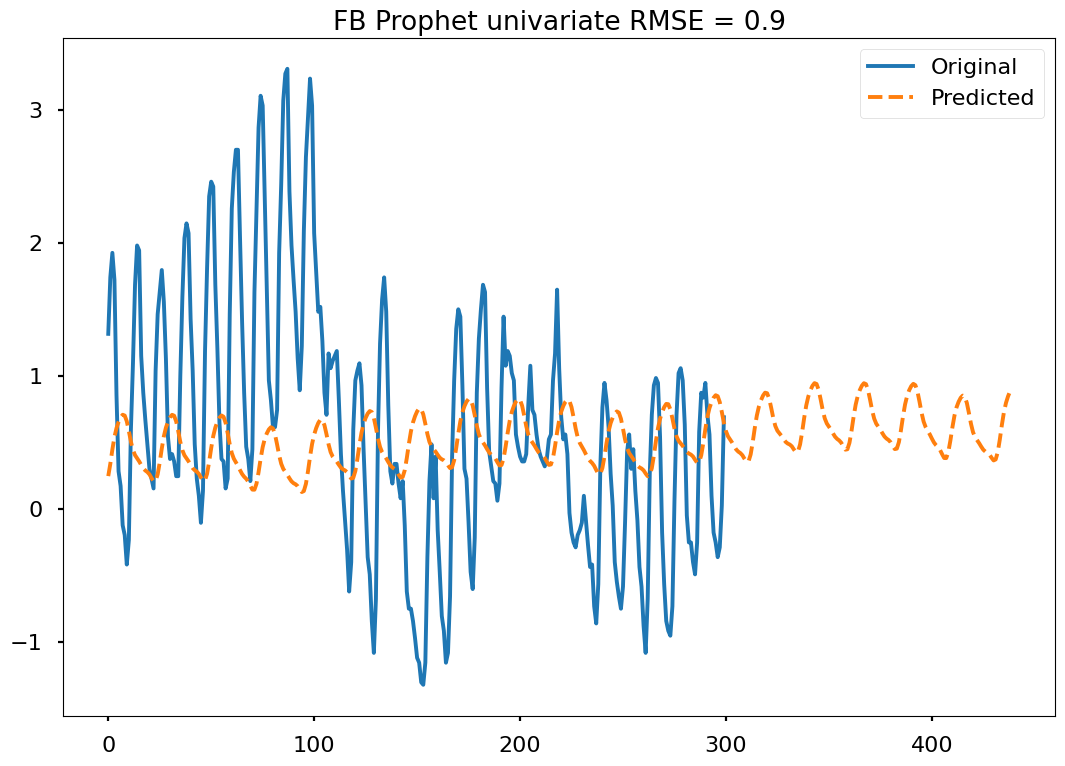

In [275]:
plt.style.use('seaborn-poster')
plt.figure()
plt.plot(dataList[0:300], label='Original')
plt.plot(forecast['yhat'][1000:1440].values, ls='--', label="Predicted")
plt.legend(loc='best')
plt.title('FB Prophet univariate RMSE = 0.9')
plt.show()

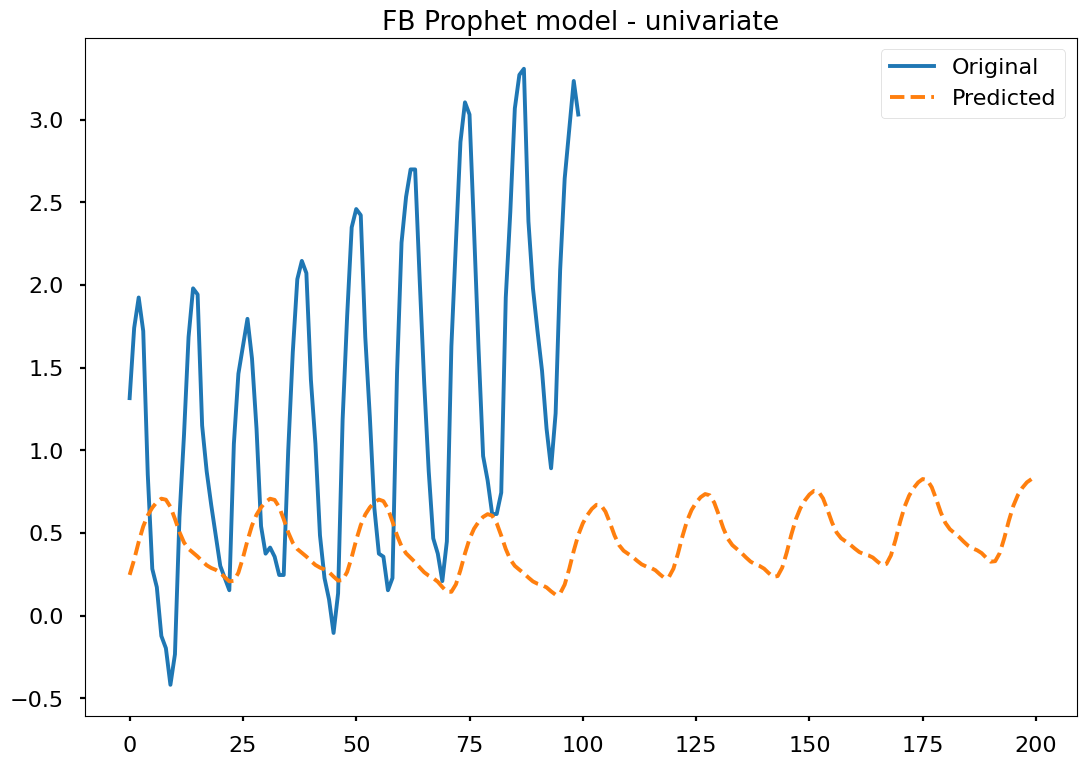

In [276]:
plt.style.use('seaborn-poster')
plt.figure()
plt.plot(dataList[0:100], label='Original')
plt.plot(forecast['yhat'][1000:1200].values, ls='--', label="Predicted")
plt.legend(loc='best')
plt.title('FB Prophet model - univariate')
plt.show()

## FB Prophet multivariate

In [281]:
print(float_data.shape)
float_dataNoTemp = np.delete(float_data, 1, axis=1)
NoTemp = pd.DataFrame(float_dataNoTemp)
print(NoTemp.shape)
NoTemp.head()

(2880, 7)
(2880, 6)


,0,1,2,3,4,5
0,-0.714221,1.182500,-0.541943,1.216508,-0.343890,2.270208
1,-0.751130,1.140069,-1.159194,1.469936,-1.046580,2.270208
2,-0.769584,1.166589,-1.313507,0.310251,-1.202733,2.270208
3,-0.806494,1.304488,-1.236350,-1.802323,-1.280810,2.270208
4,-0.861858,1.230235,-1.159194,-0.101316,-1.358886,2.270208


In [283]:
temp4Prophet = pd.DataFrame(temp)
temp4Prophet.columns=['y']
temp4Prophet['ds'] = date_rng[0:2880]
temp4Prophet = temp4Prophet[['ds','y']]
print(temp4Prophet.shape)
temp4Prophet.head()

(2880, 2)


,ds,y
0,2021-01-01 00:00:00,-0.714221
1,2021-01-01 01:00:00,-0.751130
2,2021-01-01 02:00:00,-0.769584
3,2021-01-01 03:00:00,-0.806494
4,2021-01-01 04:00:00,-0.861858


In [285]:
MultiVar4Prophet = pd.concat([temp4Prophet, NoTemp], axis=1)
MultiVar4Prophet.columns = ['ds', 'y', 'v0','v1','v2','v3','v4','v5']
print(MultiVar4Prophet.shape)
MultiVar4Prophet

(2880, 8)


,ds,y,v0,v1,v2,v3,v4,v5
0,2021-01-01 00:00:00,-0.714221,-0.714221,1.182500,-0.541943,1.216508,-0.343890,2.270208
1,2021-01-01 01:00:00,-0.751130,-0.751130,1.140069,-1.159194,1.469936,-1.046580,2.270208
2,2021-01-01 02:00:00,-0.769584,-0.769584,1.166589,-1.313507,0.310251,-1.202733,2.270208
3,2021-01-01 03:00:00,-0.806494,-0.806494,1.304488,-1.236350,-1.802323,-1.280810,2.270208
4,2021-01-01 04:00:00,-0.861858,-0.861858,1.230235,-1.159194,-0.101316,-1.358886,2.270208
...,...,...,...,...,...,...,...,...
2875,2021-04-30 19:00:00,2.090886,2.090886,-0.562463,-0.079005,-0.072932,-0.265813,-0.440488
2876,2021-04-30 20:00:00,1.980158,1.980158,-0.689755,0.306777,0.319374,0.436877,-0.440488
2877,2021-04-30 21:00:00,1.703338,1.703338,-0.047991,1.464122,0.112577,1.608027,2.270208
2878,2021-04-30 22:00:00,1.684884,1.684884,-0.069206,1.772748,0.066960,1.295720,2.270208


In [286]:
# Reduce dataset by a factor of 2 - one row per two hours instead of every hour 

print(MultiVar4Prophet.shape)
MultiVar4Prophet = MultiVar4Prophet.iloc[::2, :]
MultiVar4Prophet.shape

(2880, 8)


(1440, 8)

In [288]:
#Split into train = 300k/6 and test = 420551/6 - 300k/6

trainProphet = MultiVar4Prophet.iloc[0:1000]
print(trainProphet.shape)
trainProphet.head()

(1000, 8)


,ds,y,v0,v1,v2,v3,v4,v5
0,2021-01-01 00:00:00,-0.714221,-0.714221,1.182500,-0.541943,1.216508,-0.343890,2.270208
2,2021-01-01 02:00:00,-0.769584,-0.769584,1.166589,-1.313507,0.310251,-1.202733,2.270208
4,2021-01-01 04:00:00,-0.861858,-0.861858,1.230235,-1.159194,-0.101316,-1.358886,2.270208
6,2021-01-01 06:00:00,-1.009495,-1.009495,1.357527,-0.773412,1.299633,-0.734273,2.270208
8,2021-01-01 08:00:00,-0.972586,-0.972586,1.442388,-1.313507,-1.288371,-1.358886,2.270208


In [289]:
testProphet = MultiVar4Prophet.iloc[1001:]
testProphet.reset_index(inplace=True)
testProphet.drop('index', axis = 1, inplace=True)
print(testProphet.shape)
testProphet.head()

(439, 8)


,ds,y,v0,v1,v2,v3,v4,v5
0,2021-03-25 10:00:00,1.315791,1.315791,-1.448204,-0.773412,-1.488072,-0.890426,-0.440488
1,2021-03-25 12:00:00,1.740248,1.740248,-1.729308,-0.310474,-1.676622,-0.343890,-0.440488
2,2021-03-25 14:00:00,1.924794,1.924794,-1.782346,0.461090,-1.377578,0.124570,-0.440488
3,2021-03-25 16:00:00,1.721793,1.721793,-1.649750,1.155497,-1.064341,1.217643,-0.440488
4,2021-03-25 18:00:00,0.854425,0.854425,-1.119366,2.004217,-0.884914,2.076487,-0.440488


In [290]:
%%time

# Train

# Adding the other features / cols = Multivariate


model = Prophet(changepoint_prior_scale=0.001,
               seasonality_prior_scale = 0.01) 

model.add_regressor('v0')
model.add_regressor('v1')
model.add_regressor('v2')
model.add_regressor('v3')
model.add_regressor('v4')
model.add_regressor('v5')
#model.add_regressor('v6')
#model.add_regressor('v7')
#model.add_regressor('v8')
#model.add_regressor('v9')
#model.add_regressor('v10')
#model.add_regressor('v11')
#model.add_regressor('v12')

model.fit(trainProphet) # fit the model with the dataframe
print('Prophet is trained')

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/Users/riccardobaratin/Library/Python/3.8/lib/python/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [191]:
testProphet.head()

,ds,y
0,2021-02-28 10:00:00,0.484792
1,2021-02-28 12:00:00,0.724668
2,2021-02-28 14:00:00,0.853832
3,2021-02-28 16:00:00,0.780024
4,2021-02-28 18:00:00,0.152656


In [192]:
%%time

# Forecast / Predict

future = model.make_future_dataframe(periods = testProphet.shape[0], freq = '2H')  
forecast = model.predict(testProphet)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

/Users/riccardobaratin/Library/Python/3.8/lib/python/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/riccardobaratin/Library/Python/3.8/lib/python/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


CPU times: user 6.55 s, sys: 7.62 s, total: 14.2 s
Wall time: 2.11 s


,ds,yhat,yhat_lower,yhat_upper
0,2021-02-28 10:00:00,0.243322,-0.540557,1.011749
1,2021-02-28 12:00:00,0.329946,-0.438159,1.071145
2,2021-02-28 14:00:00,0.363017,-0.471821,1.140009
3,2021-02-28 16:00:00,0.319367,-0.468252,1.077048
4,2021-02-28 18:00:00,0.209844,-0.518885,0.974944
...,...,...,...,...
735,2021-04-30 16:00:00,1.924814,1.154764,2.601600
736,2021-04-30 18:00:00,1.818265,1.052296,2.558888
737,2021-04-30 20:00:00,1.757417,0.964460,2.471073
738,2021-04-30 22:00:00,1.736060,0.992610,2.560265


In [193]:
dataList = list(testProphet.y.values)
print(len(dataList))
print(len(forecast['yhat']))

740
740


In [194]:
rmse = sqrt(mean_squared_error(dataList,forecast['yhat']))
print('Prophet RMSE: %.3f' % rmse)

mae = mean_absolute_error(dataList,forecast['yhat'])
print('Prophet MAE: %.3f' % mae)

Prophet RMSE: 0.968
Prophet MAE: 0.797
